# Clustering using Breast Cancer dataset

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(30)

#### Loading breast cancer dataset

In [3]:
breast_cancer = datasets.load_breast_cancer()

In [4]:
x = pd.DataFrame(breast_cancer.data)
x.columns = breast_cancer.feature_names
y = pd.DataFrame(breast_cancer.target)
y.columns = ['target']

In [5]:
x.describe(include = 'all')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Choosing the number of clusters

It is best to use 2 clusters according to the knob techinque

In [6]:
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()


def select_clusters(dataset, init_cluster='k-means++', tolerance=0.0001,loops=10,max_iterations=10,
                    jobs=16):

    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        # Object KMeans
        kmeans = KMeans(n_clusters=i, max_iter=max_iterations,
                        init=init_cluster, tol=tolerance, n_jobs=jobs)

        # Calculate Kmeans
        kmeans.fit(dataset)

        # Obtain inertia
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)

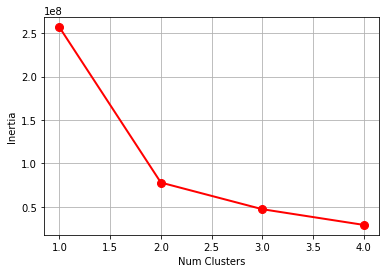

In [7]:
select_clusters(dataset = x,loops = 4)

In [8]:
model = KMeans(n_clusters=2,random_state=30)
model.fit(x)
x_predict = model.fit_predict(x)
x_transform = model.fit_transform(x)

In [9]:
print(metrics.accuracy_score(y, x_predict))
print(metrics.confusion_matrix(y, x_predict))

0.14586994727592267
[[ 82 130]
 [356   1]]


Text(0.5,1,'K Mean Classification')

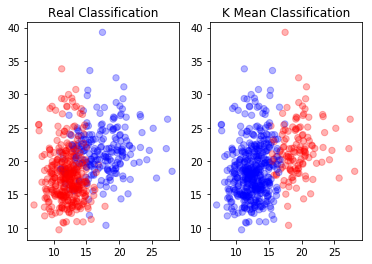

In [10]:
# Create a colormap
colormap = np.array(['b', 'r', 'g'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x['mean radius'], x['mean texture'], c=colormap[y.target], s=40,alpha=0.3)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x['mean radius'], x['mean texture'], c=colormap[model.labels_], s=40,alpha=0.3)
plt.title('K Mean Classification')

The clustering does not work properly, it is easy to tell just by taking a look at the confusion matrix, there are a lot of false positives and a lot of false negatives as well.